In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
bel_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/BEL.NS.csv', index_col='Date')

In [3]:
bel_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,2.087878,2.179797,2.040909,2.073737,1.396028,180285435
2002-07-08,2.089393,2.091414,1.944444,1.972727,1.328028,80586693
2002-07-15,1.969696,2.124747,1.834343,2.098484,1.412687,266632146
2002-07-22,2.046464,2.211616,1.989898,2.013131,1.355229,864903897
2002-07-29,2.027272,2.038383,1.691919,1.816161,1.222630,377811324


<AxesSubplot:xlabel='Date'>

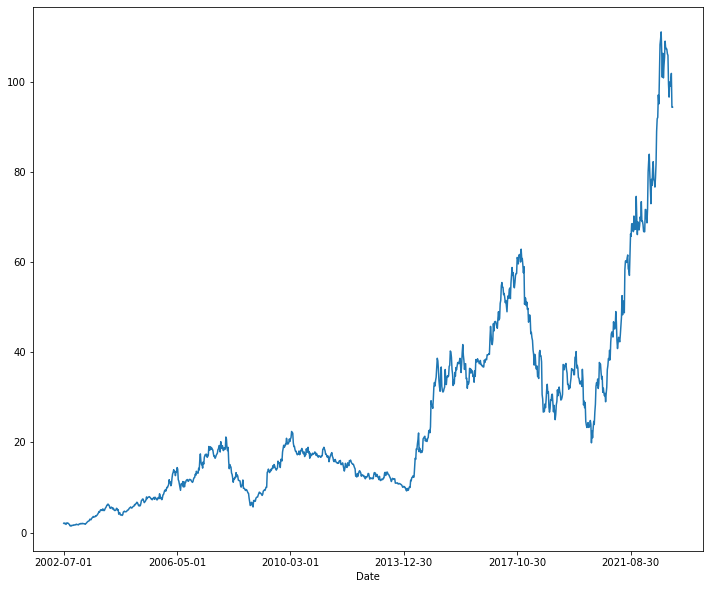

In [4]:
bel_data['Close'].plot(figsize=(12,10))

In [5]:
bel_data = bel_data.dropna()

In [6]:
len(bel_data)

1075

In [7]:
scaled_bel_data = scaler.fit_transform(bel_data)

In [8]:
scaled_bel_data.shape

(1075, 6)

In [9]:
look_back = 6

bel_data_generator = TimeseriesGenerator(scaled_bel_data, scaled_bel_data, length=look_back, batch_size=1)

In [10]:
bel_model = Sequential()

n_features = scaled_bel_data.shape[1]

bel_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
bel_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
bel_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

bel_model.add(Dense(n_features))

bel_model.compile(optimizer='adam', loss='mse')

2023-02-03 14:01:30.171244: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
bel_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [12]:
bel_model.fit(bel_data_generator, epochs=500)

2023-02-03 14:01:55.910007: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
1069/1069 [==============================] - 35s 29ms/step - loss: 0.0053
Epoch 2/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0034
Epoch 3/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0022
Epoch 4/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0020
Epoch 5/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0017
Epoch 6/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0016
Epoch 7/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0017
Epoch 8/500
1069/1069 [==============================] - 30s 28ms/step - loss: 0.0013
Epoch 9/500
1069/1069 [==============================] - 31s 29ms/step - loss: 0.0013
Epoch 10/500
1069/1069 [==============================] - 38s 36ms/step - loss: 0.0013
Epoch 11/500
1069/1069 [==============================] - 35s 33ms/step - loss: 0.0012
Epoch 12/500
1069/1069 [============================

In [13]:
bel_model.save('/kaggle/working/bel_model.h5')

In [15]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_bel_data, "/kaggle/working/scaled_bel_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")

['/kaggle/working/look_back.pkl']

<AxesSubplot:>

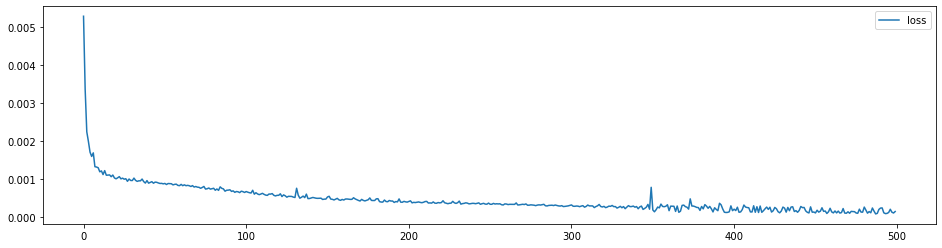

In [17]:
bel_loss = pd.DataFrame(bel_model.history.history)
bel_loss.plot(figsize=(16,4))